In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

In [5]:
df = pd.read_csv("online_shoppers_intention.csv")

# 1. data overview

Let's first check the basics of the dataset - the rows, columns, datatypes and null values.

In [6]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [8]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
# check na values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

The dataset is pretty clean and ready for the next steps - let's see how each column is distributed.

Administrative


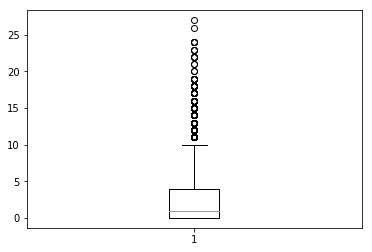

Administrative_Duration


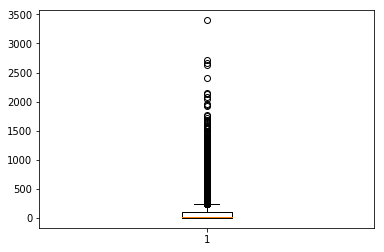

Informational


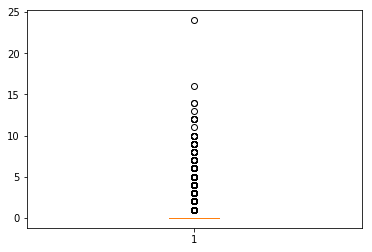

Informational_Duration


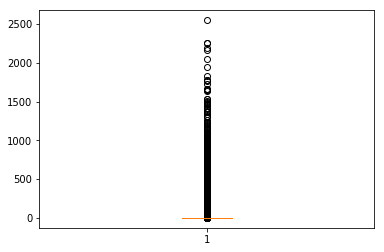

ProductRelated


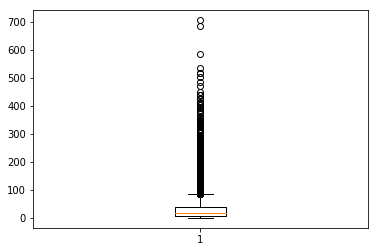

ProductRelated_Duration


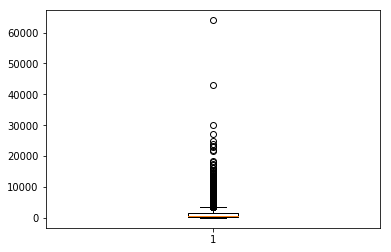

BounceRates


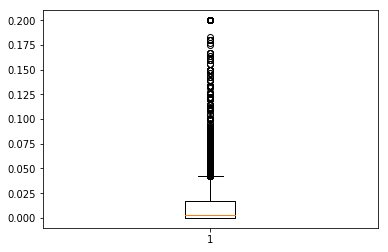

ExitRates


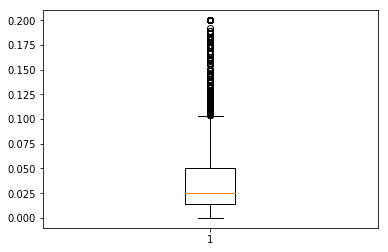

PageValues


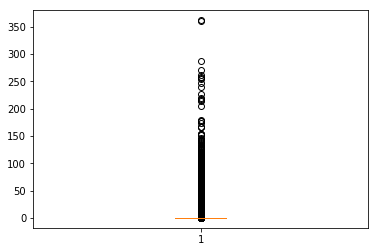

SpecialDay


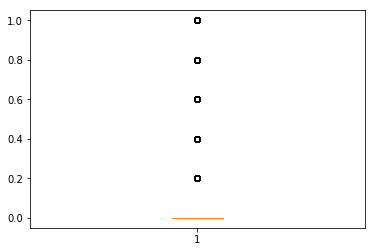

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


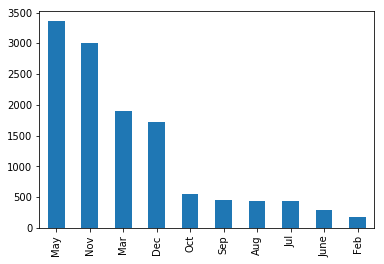

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


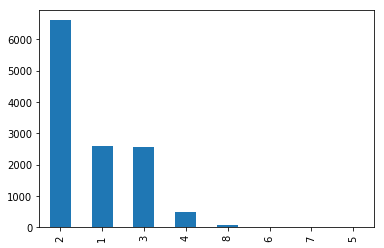

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


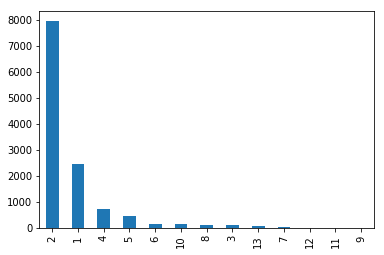

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


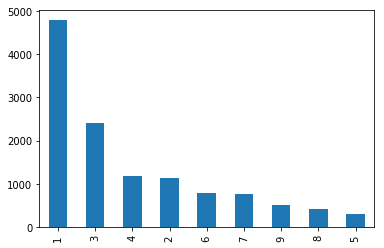

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


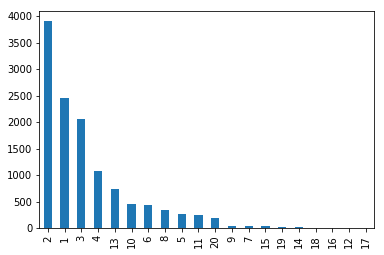

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


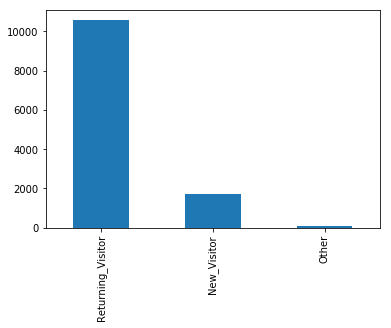

Weekend
False    9462
True     2868
Name: Weekend, dtype: int64


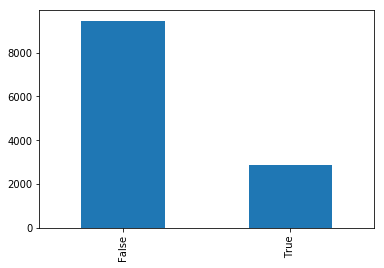

Revenue
False    10422
True      1908
Name: Revenue, dtype: int64


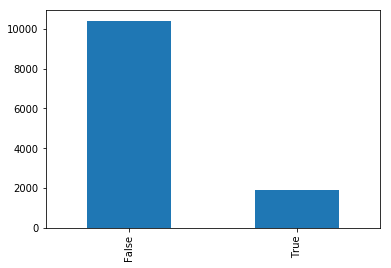

In [10]:
# type casting - bar charts for categorical columns, boxplots for numeric
cat_col = df.columns[10:16]
num_col = df.columns[0:10]
bin_col = df.columns[16:18]
for i in num_col:
    print (i)
    plt.boxplot(df[i])
    plt.show()
for i in cat_col:
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()
for i in bin_col:
    print (i)
    print (df[i].value_counts())
    df[i].value_counts().plot.bar()
    plt.show()


intersting findings: 
1. We see outliers existed in most numerical columns, especially those about page durations. It's unlikely that a person will have a session longer than hours, so we need to handle this outliers later.
2. For most categorical variables, there're some main groups, and a small number of data spreaded out in other groups. To avoid a sparse dataset after one hot encoding, we can group the small categories into one.
3. The positive class is about 15%. We may need to avoid using accuracy, over-sample the minority class or do something else to handle the class imblance issue.

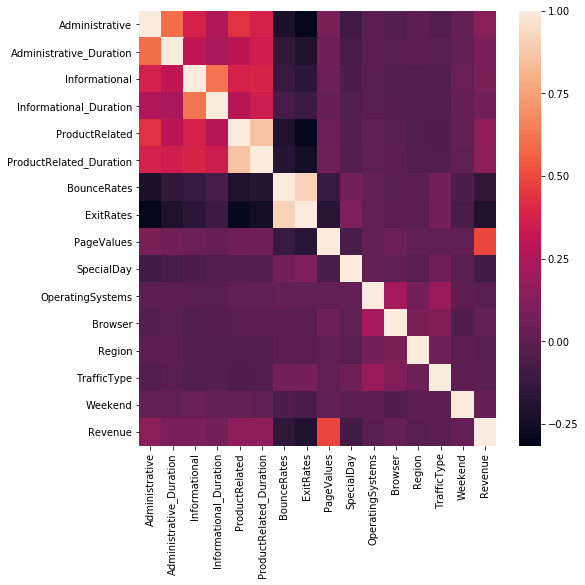

In [11]:
# check correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [22]:
df.corr()['Revenue']

Administrative             0.138917
Administrative_Duration    0.093587
Informational              0.095200
Informational_Duration     0.070345
ProductRelated             0.158538
ProductRelated_Duration    0.152373
BounceRates               -0.150673
ExitRates                 -0.207071
PageValues                 0.492569
SpecialDay                -0.082305
OperatingSystems          -0.014668
Browser                    0.023984
Region                    -0.011595
TrafficType               -0.005113
Weekend                    0.029295
Revenue                    1.000000
Name: Revenue, dtype: float64

We can see the correlation as a bivariate analysis. The heatmap shows us:

1. the visited page types are correlated with the respective duration. The 3 sets of variables are all correlated among them. 
2. PageValues is the most positively correlated to the lable, Revenue. Bounce rate and Exit rate are the most negatively correlated factors.

# 2. Modelling

At this point, we can translate the business question into a classification problem.
In this version, I want to do minimal treatment on the data and have a benchmark performance.

In [12]:
# remove outliers based on the visuals
df_o = df[(df['ProductRelated_Duration']< 20000)]
print ("removed", len(df)-len(df_o),"outliers")

removed 10 outliers


In [13]:
# one hot encoding
df_ohe = pd.get_dummies(df_o)

In [14]:
# prepare train, test and scale the data
y = df_ohe['Revenue']
X = df_ohe.drop('Revenue', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [15]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
logreg = LogisticRegressionCV(scoring = 'f1')
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cla

precision:  0.7663551401869159
recall:  0.36043956043956044
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2625
        True       0.77      0.36      0.49       455

   micro avg       0.89      0.89      0.89      3080
   macro avg       0.83      0.67      0.71      3080
weighted avg       0.88      0.89      0.87      3080



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))

precision:  0.7817109144542773
recall:  0.5824175824175825
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      2625
        True       0.78      0.58      0.67       455

   micro avg       0.91      0.91      0.91      3080
   macro avg       0.86      0.78      0.81      3080
weighted avg       0.91      0.91      0.91      3080



In [20]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
print (classification_report(y_test,y_pred))

precision:  0.3179805137289637
recall:  0.789010989010989
              precision    recall  f1-score   support

       False       0.95      0.71      0.81      2625
        True       0.32      0.79      0.45       455

   micro avg       0.72      0.72      0.72      3080
   macro avg       0.63      0.75      0.63      3080
weighted avg       0.86      0.72      0.76      3080



Judging by the results from the vanila models, Random Forest is the one has the highest F1 score, and Naive Bayes also has impressive recall compared to the other 2 models. We will spend sometime on these 2 later.

Using rfc model, we can predict the conversion rate on the test population:

In [21]:
y_pred = rfc.predict(X_test_scaled)
print ("the predicted conversion rate is", y_pred.mean())
print ("the actual conversion rate is", y_test.mean())

the predicted conversion rate is 0.11006493506493506
the actual conversion rate is 0.14772727272727273


Next, we can take a closer look at the factors and how the models weighs them:

In [22]:
coef = logreg.coef_[0]
# plt.figure(figsize=(20,20))
# plt.barh(y=X.columns,width = coef)
# plt.show()


top_10 = np.argsort(-np.absolute(coef))[:10]
for i in top_10:
    print ("%-25s %s" % ((X.columns[i], coef[i])))

PageValues                28.554620954987495
ExitRates                 -2.9297177389953832
ProductRelated_Duration   2.0215738664721767
Month_Feb                 -1.461357104031213
Informational             0.8102802869100746
Month_Nov                 0.7965846625736575
BounceRates               -0.5991101509944281
OperatingSystems          -0.5462499646698228
Browser                   0.5111161810136227
ProductRelated            0.46313854387921255


precision:  0.7813411078717201
recall:  0.589010989010989


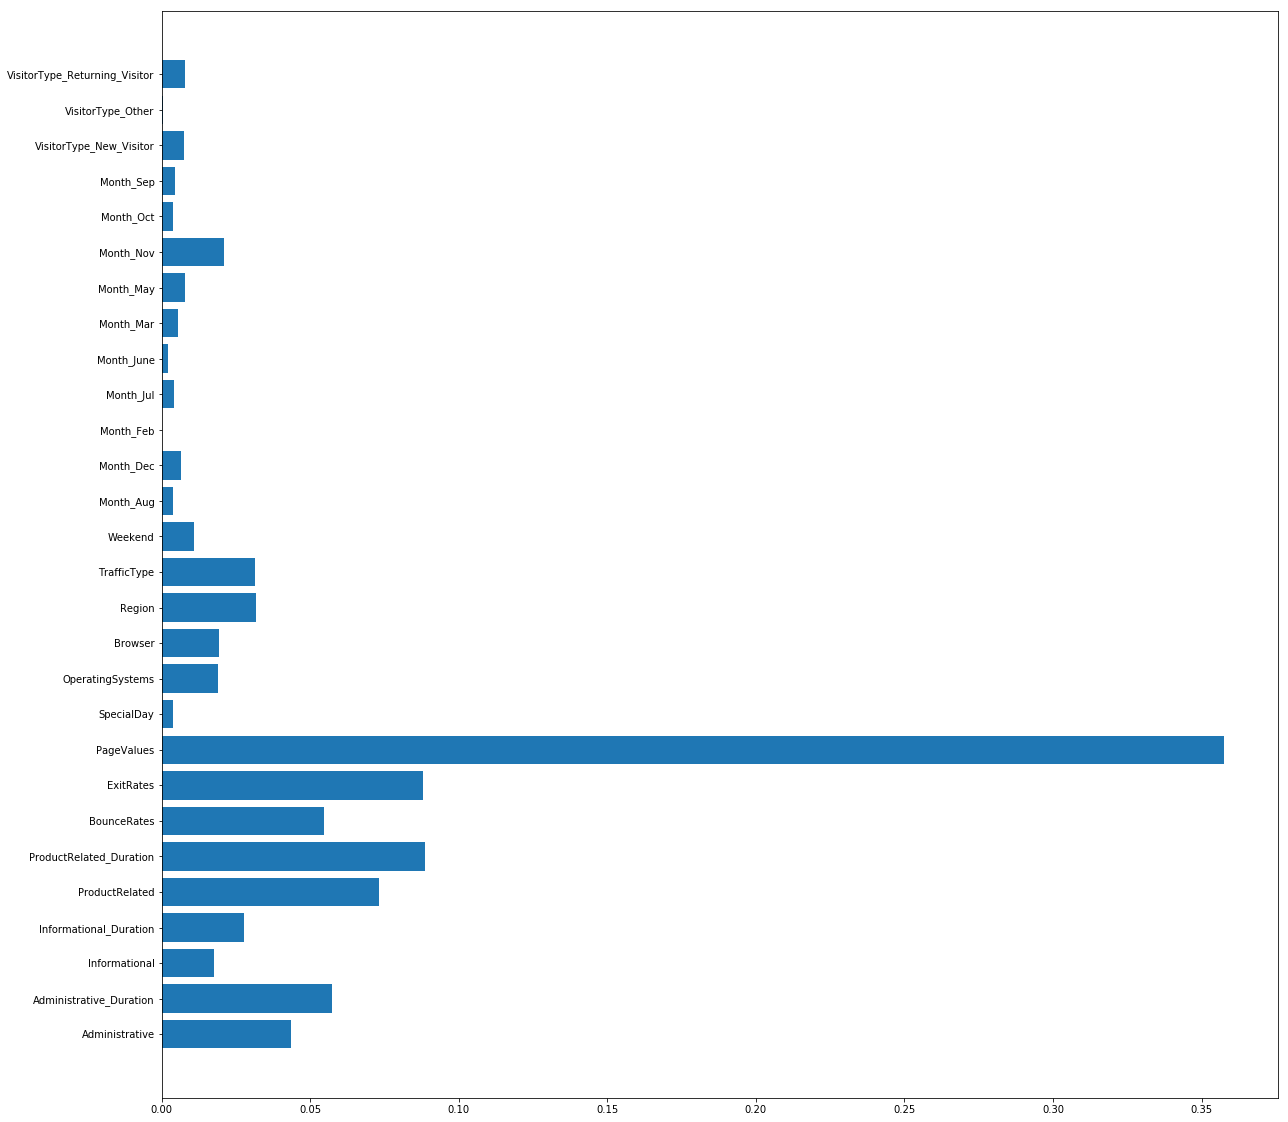

PageValues                0.35766384734971857
ProductRelated_Duration   0.08865626828268386
ExitRates                 0.08790598891550135
ProductRelated            0.07315257618607514
Administrative_Duration   0.05742633442459943
BounceRates               0.05460924020519502
Administrative            0.04349767209542546
Region                    0.031702699718194
TrafficType               0.03136323631589403
Informational_Duration    0.027862017064321405


In [28]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)
print ("precision: ", precision_score(y_test,y_pred))
print ("recall: ", recall_score(y_test,y_pred))
coef = rfc.feature_importances_
plt.figure(figsize=(20,20))
plt.barh(y=X.columns,width = coef)
plt.show()


top_10 = np.argsort(-np.absolute(coef))[:10]
for i in top_10:
    print ("%-25s %s" % ((X.columns[i], coef[i])))